In [ ]:
# Image Visualization 

## 🌾 Early Detection of Crop Issues in Wheat Using NDVI and CNN Architecture

This architecture is designed to **enable early detection of crop issues in wheat** before maturity. By calculating the **Normalized Difference Vegetation Index (NDVI)** and leveraging a **Convolutional Neural Network (CNN)**, we can classify wheat health into distinct categories, ensuring timely and effective crop management.

### 🧮 **NDVI Formula**  
The NDVI is calculated using the following formula:

\[
\text{NDVI} = \frac{(\text{NIR} - \text{Red})}{(\text{NIR} + \text{Red})}
\]

- **NIR (Near-Infrared)**: Reflectance in the near-infrared spectrum.  
- **Red**: Reflectance in the red spectrum.

### ✅ **Benefits of NDVI Calculation**
- **Early Stress Detection**: Identifies early signs of water stress, disease, or nutrient deficiency, allowing proactive intervention.  
- **Health Monitoring**: Continuously assesses crop health throughout different growth stages.  
- **Targeted Resource Management**: Helps in focusing resources (like water or fertilizers) where they are most needed.  
- **Improved Yield Predictions**: By monitoring health trends, farmers can better estimate final yields.

### 🌿 **Classification Categories**
The wheat crop health is categorized into three classes based on NDVI values:

1. **Unhealthy-Sparse Vegetation**: Indicates weak or stressed crop areas needing urgent attention.  
2. **Moderate Vegetation**: Represents average crop health, requiring moderate monitoring.  
3. **Healthy-Dense Vegetation**: Reflects well-growing, dense crop areas with minimal issues.

This classification aids in **visualizing crop health spatially**, ensuring that decisions are made based on accurate, real-time data. It forms a foundation for **data-driven, sustainable agriculture**.


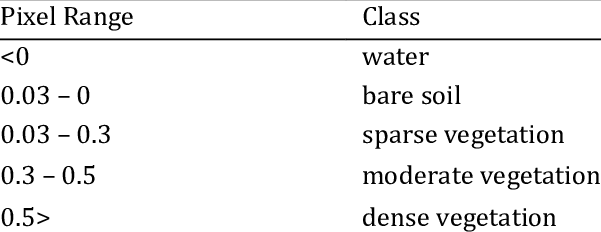

In [6]:
from IPython.display import Image, display

path = r"C:\Users\VECTUS\OneDrive\Desktop\Test_Temp\ndvi.png"
# Display an image from a file
display(Image(filename=path))


C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0311.tif - NIR Min: 0.15429922941939422, Max: 0.997085526817731
C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0312.tif - NIR Min: 0.1386739909971771, Max: 0.9961089494163424
C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0313.tif - NIR Min: 0.10254062714579995, Max: 0.997085526817731
C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0314.tif - NIR Min: 0.1523460746166171, Max: 0.990249485008011
C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0315.tif - NIR Min: 0.1621118486305028, Max: 0.976577401388571
Red Channel - Min: 0.043137254901960784, Max: 0.7764705882352941
NDVI Mean: 0.017542994657560602
Classified as: 

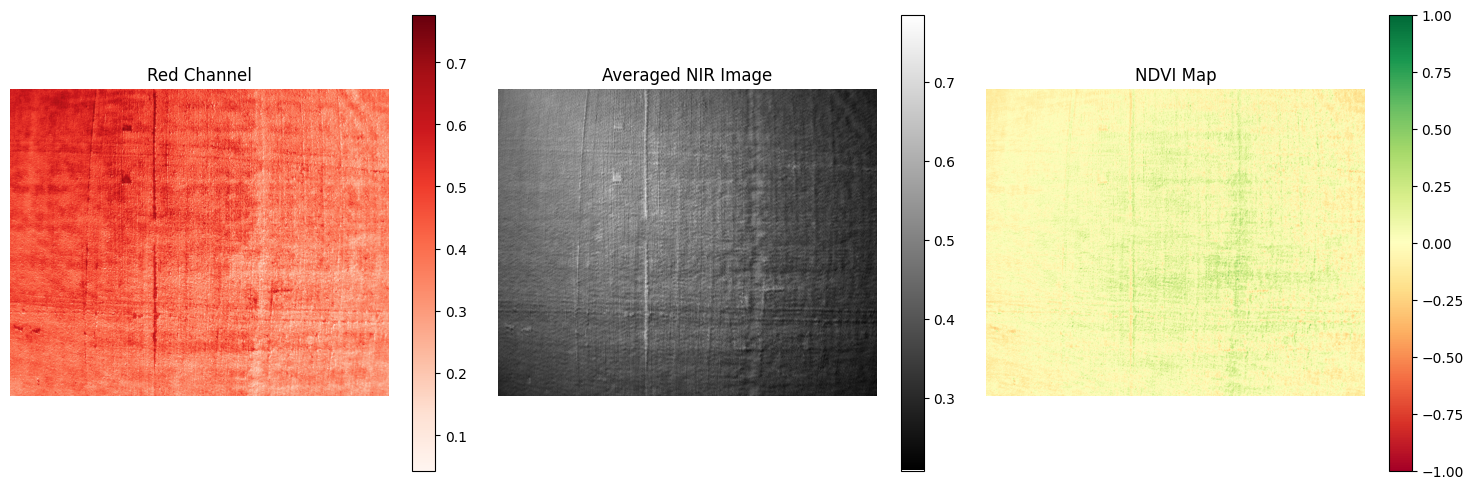

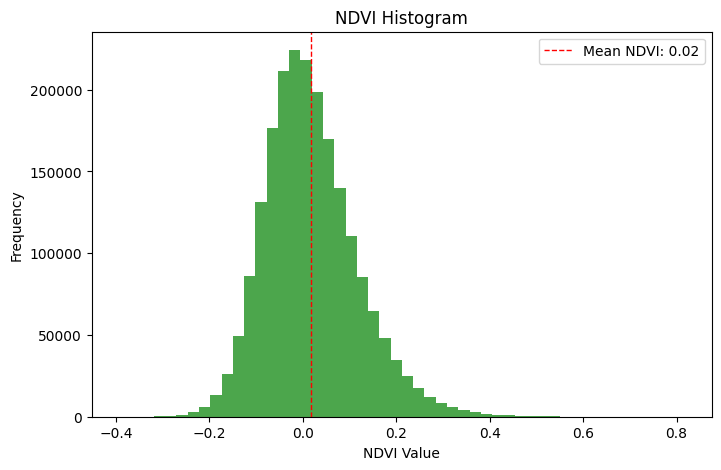

In [2]:
import numpy as np
import rasterio
from PIL import Image
import matplotlib.pyplot as plt

# File paths
rgb_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0310.JPG"
nir_paths = [
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0311.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0312.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0313.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0314.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0315.tif"
]

# Load RGB image and extract the RED channel
rgb_image = np.array(Image.open(rgb_path)).astype(float)
red_channel = rgb_image[:, :, 0] / 255.0  # Normalize Red channel to [0, 1]

# Load and normalize NIR images
nir_images = []
for nir_path in nir_paths:
    with rasterio.open(nir_path) as src:
        nir = src.read(1).astype(float)
        # Resize NIR to match Red channel dimensions if necessary
        if nir.shape != red_channel.shape:
            nir = np.array(Image.fromarray(nir).resize(red_channel.shape[::-1], Image.BILINEAR))
        
        # Normalize NIR to [0, 1] based on bit depth
        nir_normalized = nir / 65535.0  # Assuming 16-bit NIR data
        print(f"{nir_path} - NIR Min: {nir_normalized.min()}, Max: {nir_normalized.max()}")
        nir_images.append(nir_normalized)

# Average the NIR images
nir_avg = np.mean(nir_images, axis=0)

# Print Red channel stats
print(f"Red Channel - Min: {red_channel.min()}, Max: {red_channel.max()}")

# Calculate NDVI
ndvi = (nir_avg - red_channel) / (nir_avg + red_channel + 1e-6)  # Add small constant to avoid division by zero
ndvi = np.clip(ndvi, -1, 1)  # Clip NDVI to valid range [-1, 1]

# Mask invalid pixels (where NIR + Red is zero)
mask = (nir_avg + red_channel) != 0
ndvi_mean = np.mean(ndvi[mask]) if np.any(mask) else 0

print(f"NDVI Mean: {ndvi_mean}")

# Classification
if ndvi_mean < 0:
    category = "Non-Vegetation"
elif ndvi_mean < 0.33:
    category = "Unhealthy-Sparse"
elif ndvi_mean < 0.66:
    category = "Moderate Vegetation"
else:
    category = "Healthy-Dense Vegetation"

print(f"Classified as: {category}")

# Plot for visual inspection
plt.figure(figsize=(15, 5))

# Red Channel
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.colorbar()
plt.axis('off')

# Averaged NIR Image
plt.subplot(1, 3, 2)
plt.imshow(nir_avg, cmap='gray')
plt.title('Averaged NIR Image')
plt.colorbar()
plt.axis('off')

# NDVI Map
plt.subplot(1, 3, 3)
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)  # Use RdYlGn colormap for NDVI
plt.title('NDVI Map')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()

# Debugging: Plot NDVI histogram
plt.figure(figsize=(8, 5))
plt.hist(ndvi[mask].flatten(), bins=50, color='green', alpha=0.7)
plt.title('NDVI Histogram')
plt.xlabel('NDVI Value')
plt.ylabel('Frequency')
plt.axvline(ndvi_mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean NDVI: {ndvi_mean:.2f}')
plt.legend()
plt.show()

Red channel - Min: 2 Max: 255 Mean: 98.61016201923077
NIR combined - Min: 0 Max: 65472 Mean: 32942.1704
Red Normalized - Min: 0.00784313725490196 Max: 1.0 Mean: 0.38670651772247366
NIR Normalized - Min: 0.0 Max: 1.0 Mean: 0.5031489858260019
NDVI - Min: -0.9999989759046632 Max: 0.9758684370895334 Mean: 0.06837339907268143
NDVI Mean (Masked): 0.2937
NDVI Mean (Masked): 0.2937
Classified as: Unhealthy-Sparse Vegetation


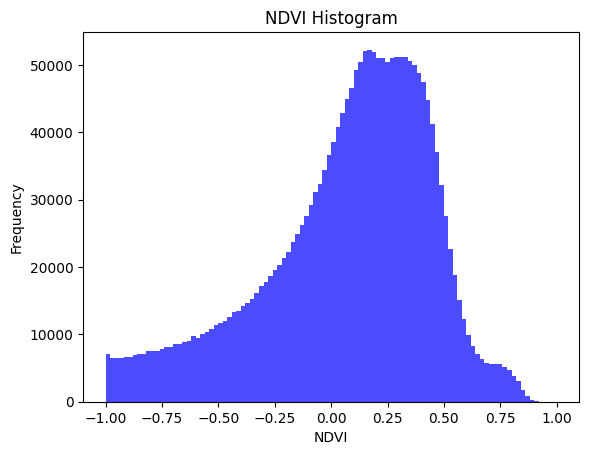

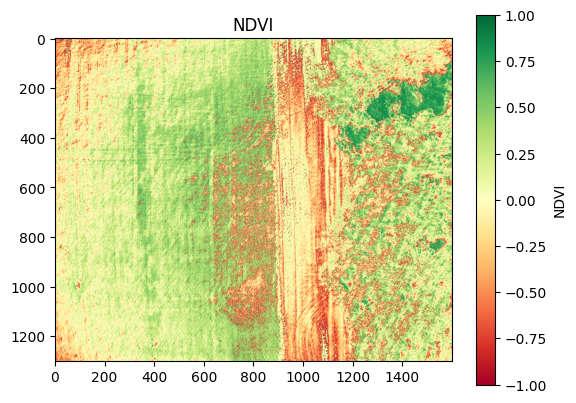

In [5]:
import numpy as np
from PIL import Image
import rasterio
import matplotlib.pyplot as plt

# File paths
rgb_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0910.JPG"
nir_paths = [
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0911.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0912.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0913.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0914.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0915.tif"
]

# Load RGB and extract Red channel
rgb_image = Image.open(rgb_path)
red = np.array(rgb_image)[:, :, 0]

# Load and combine NIR images
nir_combined = None
for nir_path in nir_paths:
    with rasterio.open(nir_path) as src:
        nir = src.read(1)
    if nir_combined is None:
        nir_combined = nir
    else:
        nir_combined += nir

# Resize NIR to match Red shape
nir_resized = Image.fromarray(nir_combined).resize(red.shape[::-1], resample=Image.Resampling.BILINEAR)
nir_combined = np.array(nir_resized)

# Debug: Check Red and NIR values
print("Red channel - Min:", np.min(red), "Max:", np.max(red), "Mean:", np.mean(red))
print("NIR combined - Min:", np.min(nir_combined), "Max:", np.max(nir_combined), "Mean:", np.mean(nir_combined))

# Normalize Red and NIR to [0, 1]
red_norm = red / 255.0 # Assuming 8-bit RGB image
nir_norm = nir_combined / np.max(nir_combined)  # Normalize by the actual max value of the combined NIR image

# Debug: Check normalized values
print("Red Normalized - Min:", np.min(red_norm), "Max:", np.max(red_norm), "Mean:", np.mean(red_norm))
print("NIR Normalized - Min:", np.min(nir_norm), "Max:", np.max(nir_norm), "Mean:", np.mean(nir_norm))

# Calculate NDVI
ndvi = (nir_norm - red_norm) / (nir_norm + red_norm + 1e-6)

# Debug: Check NDVI values
print("NDVI - Min:", np.min(ndvi), "Max:", np.max(ndvi), "Mean:", np.mean(ndvi))

# Mask out non-vegetated areas (NDVI < 0)
ndvi_masked = np.where(ndvi < 0, np.nan, ndvi)

# Calculate mean NDVI for vegetated areas only
ndvi_mean_masked = np.nanmean(ndvi_masked)
print(f"NDVI Mean (Masked): {ndvi_mean_masked:.4f}")

# Classification based on masked NDVI mean
if np.isnan(ndvi_mean_masked):  # If all pixels are masked (no vegetation)
    category = "Non-Vegetation"
elif ndvi_mean_masked < 0.3:
    category = "Unhealthy-Sparse Vegetation"
elif ndvi_mean_masked < 0.5:
    category = "Moderate Vegetation"
else:
    category = "Healthy-Dense Vegetation"

# Output results
print(f"NDVI Mean (Masked): {ndvi_mean_masked:.4f}")
print(f"Classified as: {category}")

# Plot NDVI histogram
plt.hist(ndvi.flatten(), bins=100, range=(-1, 1), color='blue', alpha=0.7)
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.title('NDVI Histogram')
plt.show()

# Visualize NDVI
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI')
plt.show()


Red channel - Min: 3 Max: 218 Mean: 111.4600485576923
NIR combined - Min: 0 Max: 65472 Mean: 31819.3896
Red Normalized - Min: 0.011764705882352941 Max: 0.8549019607843137 Mean: 0.4370982296380092
NIR Normalized - Min: 0.0 Max: 1.0 Mean: 0.4859999633431086
NDVI - Min: -0.9999987185946068 Max: 0.9765620642287993 Mean: -0.02738242153528087
NDVI Mean (Masked): 0.3072
NDVI Mean (Masked): 0.3072
Classified as: Moderate Vegetation


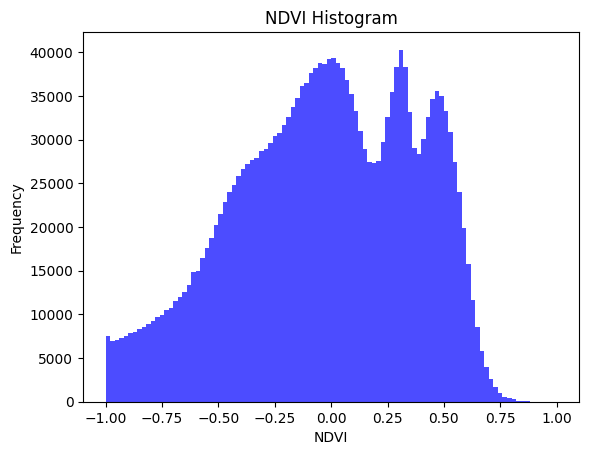

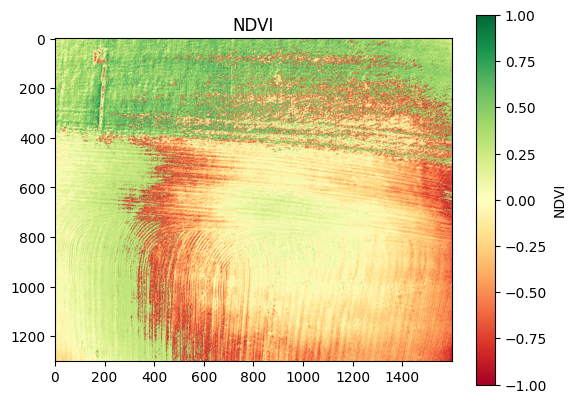

In [7]:
import numpy as np
from PIL import Image
import rasterio
import matplotlib.pyplot as plt

# File paths
rgb_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0010.JPG"
nir_paths = [
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0011.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0012.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0013.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0014.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0015.tif"
]

# Load RGB and extract Red channel
rgb_image = Image.open(rgb_path)
red = np.array(rgb_image)[:, :, 0]

# Load and combine NIR images
nir_combined = None
for nir_path in nir_paths:
    with rasterio.open(nir_path) as src:
        nir = src.read(1)
    if nir_combined is None:
        nir_combined = nir
    else:
        nir_combined += nir

# Resize NIR to match Red shape
nir_resized = Image.fromarray(nir_combined).resize(red.shape[::-1], resample=Image.Resampling.BILINEAR)
nir_combined = np.array(nir_resized)

# Debug: Check Red and NIR values
print("Red channel - Min:", np.min(red), "Max:", np.max(red), "Mean:", np.mean(red))
print("NIR combined - Min:", np.min(nir_combined), "Max:", np.max(nir_combined), "Mean:", np.mean(nir_combined))

# Normalize Red and NIR to [0, 1]
red_norm = red / 255.0 # Assuming 8-bit RGB image
nir_norm = nir_combined / np.max(nir_combined)  # Normalize by the actual max value of the combined NIR image

# Debug: Check normalized values
print("Red Normalized - Min:", np.min(red_norm), "Max:", np.max(red_norm), "Mean:", np.mean(red_norm))
print("NIR Normalized - Min:", np.min(nir_norm), "Max:", np.max(nir_norm), "Mean:", np.mean(nir_norm))

# Calculate NDVI
ndvi = (nir_norm - red_norm) / (nir_norm + red_norm + 1e-6)

# Debug: Check NDVI values
print("NDVI - Min:", np.min(ndvi), "Max:", np.max(ndvi), "Mean:", np.mean(ndvi))

# Mask out non-vegetated areas (NDVI < 0)
ndvi_masked = np.where(ndvi < 0, np.nan, ndvi)

# Calculate mean NDVI for vegetated areas only
ndvi_mean_masked = np.nanmean(ndvi_masked)
print(f"NDVI Mean (Masked): {ndvi_mean_masked:.4f}")

# Classification based on masked NDVI mean
if np.isnan(ndvi_mean_masked):  # If all pixels are masked (no vegetation)
    category = "Non-Vegetation"
elif ndvi_mean_masked < 0.3:
    category = "Unhealthy-Sparse Vegetation"
elif ndvi_mean_masked < 0.5:
    category = "Moderate Vegetation"
else:
    category = "Healthy-Dense Vegetation"

# Output results
print(f"NDVI Mean (Masked): {ndvi_mean_masked:.4f}")
print(f"Classified as: {category}")

# Plot NDVI histogram
plt.hist(ndvi.flatten(), bins=100, range=(-1, 1), color='blue', alpha=0.7)
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.title('NDVI Histogram')
plt.show()

# Visualize NDVI
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI')
plt.show()


Red channel - Min: 22 Max: 202 Mean: 111.51945528846154
NIR combined - Min: 0 Max: 65472 Mean: 34107.37843076923
Red Normalized - Min: 0.08627450980392157 Max: 0.792156862745098 Mean: 0.43733119720965286
NIR Normalized - Min: 0.0 Max: 1.0 Mean: 0.5209460293067147
NDVI - Min: -0.9999986141323554 Max: 0.7978623765190166 Mean: -0.0015036030267571905
NDVI Mean (Masked): 0.2399
NDVI Mean (Masked): 0.2399
Classified as: Unhealthy-Sparse Vegetation


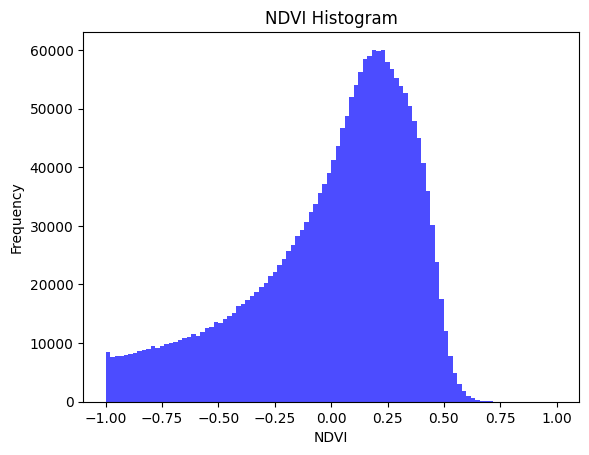

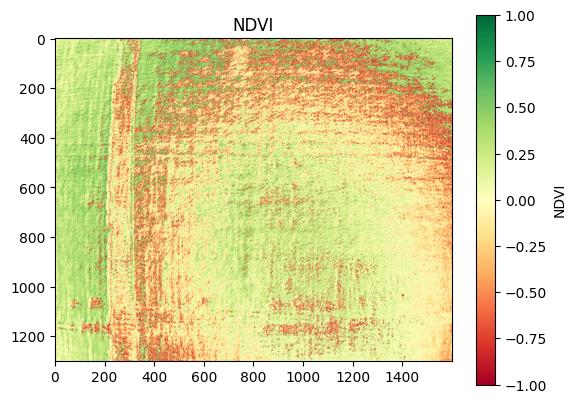

In [21]:
import numpy as np
from PIL import Image
import rasterio
import matplotlib.pyplot as plt

# File paths
rgb_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\102FPLAN\DJI_0090.JPG"
nir_paths = [
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\102FPLAN\DJI_0091.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\102FPLAN\DJI_0092.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\102FPLAN\DJI_0093.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\102FPLAN\DJI_0094.tif",
    r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\102FPLAN\DJI_0095.tif"
]

# Load RGB and extract Red channel
rgb_image = Image.open(rgb_path)
red = np.array(rgb_image)[:, :, 0]

# Load and combine NIR images
nir_combined = None
for nir_path in nir_paths:
    with rasterio.open(nir_path) as src:
        nir = src.read(1)
    if nir_combined is None:
        nir_combined = nir
    else:
        nir_combined += nir

# Resize NIR to match Red shape
nir_resized = Image.fromarray(nir_combined).resize(red.shape[::-1], resample=Image.Resampling.BILINEAR)
nir_combined = np.array(nir_resized)

# Debug: Check Red and NIR values
print("Red channel - Min:", np.min(red), "Max:", np.max(red), "Mean:", np.mean(red))
print("NIR combined - Min:", np.min(nir_combined), "Max:", np.max(nir_combined), "Mean:", np.mean(nir_combined))

# Normalize Red and NIR to [0, 1]
red_norm = red / 255.0 # Assuming 8-bit RGB image
nir_norm = nir_combined / np.max(nir_combined)  # Normalize by the actual max value of the combined NIR image

# Debug: Check normalized values
print("Red Normalized - Min:", np.min(red_norm), "Max:", np.max(red_norm), "Mean:", np.mean(red_norm))
print("NIR Normalized - Min:", np.min(nir_norm), "Max:", np.max(nir_norm), "Mean:", np.mean(nir_norm))

# Calculate NDVI
ndvi = (nir_norm - red_norm) / (nir_norm + red_norm + 1e-6)

# Debug: Check NDVI values
print("NDVI - Min:", np.min(ndvi), "Max:", np.max(ndvi), "Mean:", np.mean(ndvi))

# Mask out non-vegetated areas (NDVI < 0)
ndvi_masked = np.where(ndvi < 0, np.nan, ndvi)

# Calculate mean NDVI for vegetated areas only
ndvi_mean_masked = np.nanmean(ndvi_masked)
print(f"NDVI Mean (Masked): {ndvi_mean_masked:.4f}")

# Classification based on masked NDVI mean
if np.isnan(ndvi_mean_masked):  # If all pixels are masked (no vegetation)
    category = "Non-Vegetation"
elif ndvi_mean_masked < 0.3:
    category = "Unhealthy-Sparse Vegetation"
elif ndvi_mean_masked < 0.5:
    category = "Moderate Vegetation"
else:
    category = "Healthy-Dense Vegetation"

# Output results
print(f"NDVI Mean (Masked): {ndvi_mean_masked:.4f}")
print(f"Classified as: {category}")

# Plot NDVI histogram
plt.hist(ndvi.flatten(), bins=100, range=(-1, 1), color='blue', alpha=0.7)
plt.xlabel('NDVI')
plt.ylabel('Frequency')
plt.title('NDVI Histogram')
plt.show()

# Visualize NDVI
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI')
plt.show()


In [13]:
from PIL import Image
import numpy as np

# Load the image
image_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0202.tif"
image = Image.open(image_path)

# Display image mode and size
print("Image Mode:", image.mode)  # 'L' for grayscale, 'RGB' for color, 'I;16' for 16-bit grayscale
print("Image Size:", image.size)

# Convert to numpy array and check shape
image_array = np.array(image)
print("Array Shape:", image_array.shape)

# Determine type based on shape
if len(image_array.shape) == 2:
    print("Likely a Grayscale or Single-band Image.")
elif image_array.shape[2] == 3:
    print("RGB Image.")
elif image_array.shape[2] > 3:
    print("Possibly a Multispectral Image.")


Image Mode: I;16
Image Size: (1600, 1300)
Array Shape: (1300, 1600)
Likely a Grayscale or Single-band Image.


In [14]:
from PIL import Image
import numpy as np

# Load the image
image_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0210.JPG"
image = Image.open(image_path)

# Display image mode and size
print("Image Mode:", image.mode)  # 'L' for grayscale, 'RGB' for color, 'I;16' for 16-bit grayscale
print("Image Size:", image.size)

# Convert to numpy array and check shape
image_array = np.array(image)
print("Array Shape:", image_array.shape)

# Determine type based on shape
if len(image_array.shape) == 2:
    print("Likely a Grayscale or Single-band Image.")
elif image_array.shape[2] == 3:
    print("RGB Image.")
elif image_array.shape[2] > 3:
    print("Possibly a Multispectral Image.")


Image Mode: RGB
Image Size: (1600, 1300)
Array Shape: (1300, 1600, 3)
RGB Image.


## Dataset Description

This dataset consists of aerial images of wheat crops captured using RGB and NIR sensors. Each image is classified based on the **Normalized Difference Vegetation Index (NDVI)** into three categories:

1. **Unhealthy-Sparse Vegetation** (NDVI < 0.3)  
2. **Moderate Vegetation** (0.3 ≤ NDVI < 0.6)  
3. **Healthy-Dense Vegetation** (NDVI ≥ 0.6)  


This classification aids in the **early detection of crop health issues**, allowing for timely interventions before the wheat crop reaches maturity. The dataset is organized into folders corresponding to each class, making it suitable for training machine learning models.


In [26]:
import os
import numpy as np
import cv2
import rasterio
import shutil

# Define input and output directories
input_dir = r'C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_04\2022-07-11\105FPLAN'
output_dir = r'C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset'

# Define class folders
class_folders = {
    1: 'Unhealthy-Sparse',
    2: 'Moderate Vegetation',
    3: 'Healthy-Dense Vegetation'
}

# Create class folders
for folder in class_folders.values():
    os.makedirs(os.path.join(output_dir, folder), exist_ok=True)

# NDVI Classification Function
def classify_ndvi_value(ndvi_value):
    if np.isnan(ndvi_value):
        return None
    elif ndvi_value < 0.23:
        return 1  # Unhealthy-Sparse
    elif ndvi_value < 0.5:
        return 2  # Moderate Vegetation
    else:
        return 3  # Healthy-Dense Vegetation

# Get all images and sort them to maintain order
all_files = sorted(os.listdir(input_dir))

# Process images in batches (1 RGB + 5 NIR)
i = 0
while i < len(all_files):
    rgb_file = all_files[i]
    nir_files = all_files[i + 1:i + 6]

    # Validate file types
    if not rgb_file.lower().endswith('.jpg') or not all(f.lower().endswith('.tif') for f in nir_files):
        print(f"Skipping invalid batch starting with {rgb_file}")
        i += 6
        continue

    # Load RGB image and extract Red channel
    rgb_path = os.path.join(input_dir, rgb_file)
    rgb_image = cv2.imread(rgb_path)
    if rgb_image is None:
        print(f"Failed to load RGB image: {rgb_file}")
        i += 6
        continue
    red = rgb_image[:, :, 2]

    # Load and combine NIR images
    nir_combined = None
    for nir_file in nir_files:
        nir_path = os.path.join(input_dir, nir_file)
        try:
            with rasterio.open(nir_path) as src:
                nir = src.read(1)
            nir_combined = nir if nir_combined is None else nir_combined + nir
        except Exception as e:
            print(f"Error reading {nir_file}: {e}")
            continue

    if nir_combined is None:
        print(f"Skipping {rgb_file}: No valid NIR images.")
        i += 6
        continue

    # Normalize red and NIR channels
    red_norm = red / 255.0
    nir_norm = nir_combined / np.max(nir_combined)

    # Calculate NDVI
    ndvi = (nir_norm - red_norm) / (nir_norm + red_norm + 1e-6)

    # Mask out non-vegetated areas (NDVI < 0)
    ndvi_masked = np.where(ndvi < 0, np.nan, ndvi)

    # Calculate mean NDVI for vegetated areas only
    mean_ndvi = np.nanmean(ndvi_masked)
    print(f"Mean NDVI for {rgb_file}: {mean_ndvi:.4f}")

    # Classify based on mean NDVI
    class_index = classify_ndvi_value(mean_ndvi)

    if class_index is not None:
        class_name = class_folders[class_index]
        new_file_name = f"f4105_{os.path.splitext(rgb_file)[0]}.JPG"
        destination_path = os.path.join(output_dir, class_name, new_file_name)
        shutil.copy(rgb_path, destination_path)
        print(f"Copied and renamed {rgb_file} to {destination_path}")
    else:
        print(f"{rgb_file} classified as Non-Vegetation and skipped.")

    i += 6  # Move to the next batch

print("Dataset classification, renaming, and organization completed successfully!")


Mean NDVI for DJI_0010.JPG: 0.2120
Copied and renamed DJI_0010.JPG to C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset\Unhealthy-Sparse\f4105_DJI_0010.JPG
Mean NDVI for DJI_0020.JPG: 0.2154
Copied and renamed DJI_0020.JPG to C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset\Unhealthy-Sparse\f4105_DJI_0020.JPG
Mean NDVI for DJI_0030.JPG: 0.2189
Copied and renamed DJI_0030.JPG to C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset\Unhealthy-Sparse\f4105_DJI_0030.JPG
Mean NDVI for DJI_0040.JPG: 0.2113
Copied and renamed DJI_0040.JPG to C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset\Unhealthy-Sparse\f4105_DJI_0040.JPG
Mean NDVI for DJI_0050.JPG: 0.2036
Copied and renamed DJI_0050.JPG to C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset\Unhealthy-Sparse\f4105_DJI_0050.JPG
Mean NDVI for DJI_0060.JPG: 0.1999
Copied and renamed DJI_0060.JPG to C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset\Unhealthy-Sparse\f4105_DJI_0060.JPG
Mean NDVI for DJ

In [27]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight

In [34]:

# Paths and Parameters
dataset_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset"
img_size = (224, 224)
batch_size = 32
epochs = 30

In [35]:
# Data Augmentation and Rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4  # 20% for validation and 20% for test
)

# Training Generator (60%)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation Generator (20%)
valid_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Test Generator (20%) - Use another ImageDataGenerator to avoid data leakage
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)

test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,  # Shuffle=False for correct evaluation
    seed=24  # Different seed for different split
)


Found 420 images belonging to 3 classes.
Found 280 images belonging to 3 classes.
Found 280 images belonging to 3 classes.


In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# CNN Model Architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:

# Train the Model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.4886 - loss: 1.3283

14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.4943 - loss: 1.3106 - val_accuracy: 0.4429 - val_loss: 1.3158
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 908ms/step - accuracy: 0.7432 - loss: 0.5462 - val_accuracy: 0.4250 - val_loss: 0.9265
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 885ms/step - accuracy: 0.8369 - loss: 0.4338 - val_accuracy: 0.4071 - val_loss: 1.2119
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.7734 - loss: 0.4878

14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 880ms/step - accuracy: 0.7734 - loss: 0.4881 - val_accuracy: 0.8464 - val_loss: 0.4573
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 852ms/step - accuracy: 0.7813 - loss: 0.4350 - val_accuracy: 0.4857 - val_loss: 1.0924
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 866ms/step - accuracy: 0.8990 - loss: 0.2407 - val_accuracy: 0.3393 - val_loss: 2.0809
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 929ms/step - accuracy: 0.8860 - loss: 0.2178 - val_accuracy: 0.6929 - val_loss: 0.5488
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 960ms/step - accuracy: 0.8895 - loss: 0.2491 - val_accuracy: 0.6429 - val_loss: 0.7307
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 871ms/step - accuracy: 0.9198 - loss: 0.2170 - val_accuracy: 0.6500 - val_loss: 0.7505
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 908ms/step - accuracy: 0.8844 - loss: 0.2645 - val_accuracy: 0.6036 - val_loss: 0.6496
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 923ms/step - accuracy: 0.9453 - loss: 0.1974 - val_accuracy: 0.5

In [39]:
# Evaluate on Test Set
loss, accuracy = model.evaluate(test_generator)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 499ms/step - accuracy: 0.8311 - loss: 0.5055

Test Loss: 0.4573
Test Accuracy: 0.8464


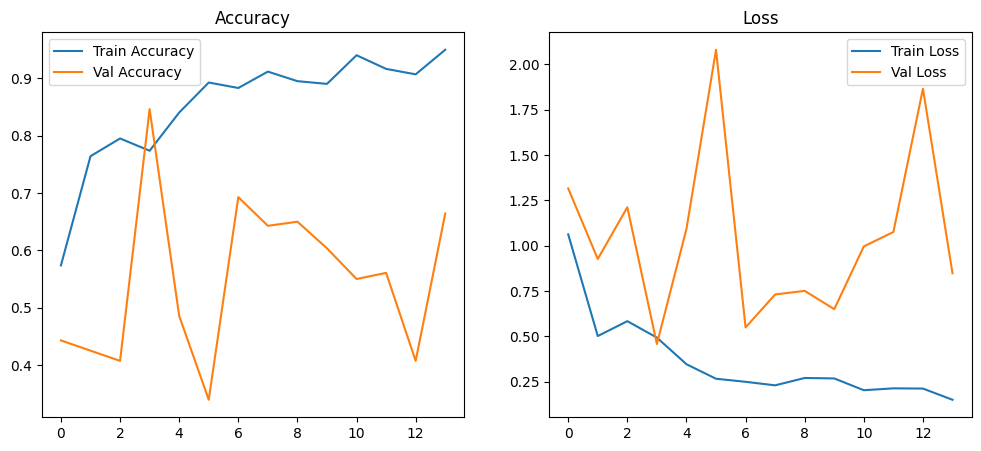

In [40]:
# Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [42]:
from sklearn.metrics import classification_report
import numpy as np
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Predict the labels for test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Generate and display the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - accuracy: 0.8311 - loss: 0.5055

Test Accuracy: 0.85
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 460ms/step

Classification Report:
                          precision    recall  f1-score   support

Healthy-Dense Vegetation       0.76      1.00      0.86        22
     Moderate Vegetation       0.88      0.62      0.73        92
        Unhealthy-Sparse       0.85      0.95      0.90       166

                accuracy                           0.85       280
               macro avg       0.83      0.86      0.83       280
            weighted avg       0.85      0.85      0.84       280



In [45]:
# Save the final model
# Define the full path with the filename and extension
path_save = r"C:\Users\VECTUS\OneDrive\Desktop\Early\EM.h5"

# Save the model
model.save(path_save)
print("\nModel saved as 'EM.h5'")



Model saved as 'EM.h5'


In [46]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Load the saved model
model_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\EM.h5"
model = load_model(model_path)

# Step 2: Load and preprocess the image
img_path =  r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0660.JPG" # Change this to your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if needed

# Step 3: Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Step 4: Map index to class label (replace with your actual class labels)
class_labels = ['Healthy-Dense Vegetation', 'Moderate Vegetation', 'Unhealthy-Sparse']
predicted_label = class_labels[predicted_class]

print(f"Predicted Class: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Class: Unhealthy-Sparse


Found 700 images belonging to 3 classes.


C:\Users\VECTUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 560ms/step


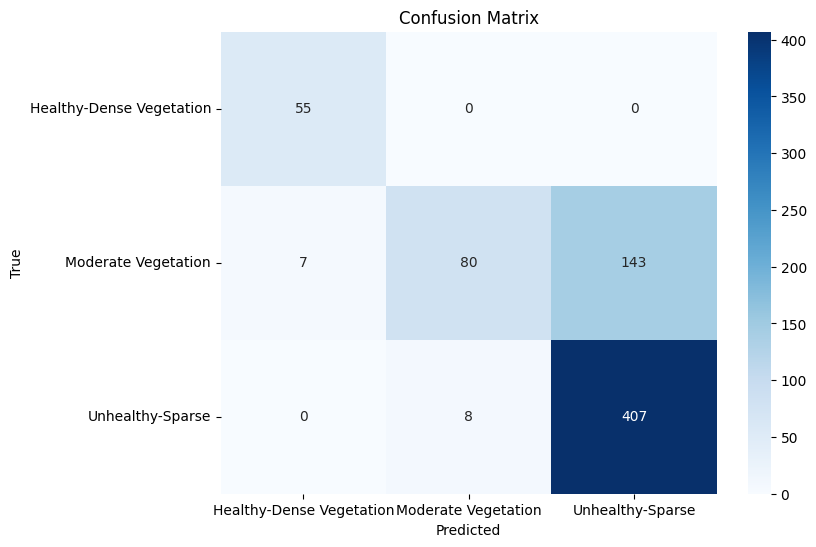


Classification Report:

                          precision    recall  f1-score   support

Healthy-Dense Vegetation       0.89      1.00      0.94        55
     Moderate Vegetation       0.91      0.35      0.50       230
        Unhealthy-Sparse       0.74      0.98      0.84       415

                accuracy                           0.77       700
               macro avg       0.85      0.78      0.76       700
            weighted avg       0.81      0.77      0.74       700



In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Prepare the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=r"C:\Users\VECTUS\OneDrive\Desktop\Early\classified_dataset",  # Path to your dataset
    target_size=(224, 224),
    batch_size=32,
    shuffle=False,  # Important for correct evaluation
    class_mode='categorical'
)

# Step 2: Get predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Step 3: Get true labels
y_true = test_generator.classes

# Step 4: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = list(test_generator.class_indices.keys())

# Step 5: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Optional: Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


In [48]:
import rasterio

# Open the TIFF image
image_path = r"C:\Users\VECTUS\OneDrive\Desktop\Early\dataset01\Component 1 - part 3-4\flight_session_03\2022-06-21\100FPLAN\DJI_0911.tif"

with rasterio.open(image_path) as src:
    # Number of bands (channels)
    num_bands = src.count
    print(f"Number of channels: {num_bands}")

    # Display the band descriptions (if available)
    print("Band Descriptions:", src.descriptions)

    # Print metadata to check for NIR info
    print("Metadata:", src.meta)

    # Check if NIR band exists (commonly band 4 for satellite images)
    # This depends on the sensor; modify based on your data specs
    if num_bands >= 4:
        print("NIR channel likely exists as band 4.")
    else:
        print("No NIR channel detected.")



Number of channels: 1
Band Descriptions: (None,)
Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1600, 'height': 1300, 'count': 1, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
No NIR channel detected.


In [55]:
import rasterio
import numpy as np

with rasterio.open(image_path ) as src:
    band = src.read(1)  # Read the single band
    print("Mean pixel value over the entire image:", np.mean(band))

    # Example: Check pixel values over a known vegetation area
    vegetation_pixels = band[100:200, 100:200]  # Adjust to your region of interest
    print("Mean pixel value over vegetation:", np.mean(vegetation_pixels))

Mean pixel value over water: 13896.5632


In [52]:
with rasterio.open(image_path ) as src:
    print(src.tags())


{'TIFFTAG_IMAGEDESCRIPTION': 'DCIM\\100FPLAN\\DJI_0911.TIF', 'TIFFTAG_SOFTWARE': 'v01.17.2029', 'TIFFTAG_DATETIME': '2022:06:21 10:39:45'}
